**Import Libraries and Data**

In [26]:
import pandas as pd

In [27]:
from google.colab import files
uploaded = files.upload()

Saving cost_of_living.csv to cost_of_living (1).csv


In [28]:
data = pd.read_csv('cost_of_living.csv')

# Display first few rows of the dataset for an overview
data.head()

country  cost_index  monthly_income  purchasing_power_index
0         Bermuda       157.6            9712                   105.0
1     Switzerland       142.4            7530                    90.1
2  Cayman Islands       137.9            5281                    65.2
3          Israel       130.2            4130                    54.1
4         Iceland       128.0            5368                    71.5

**Dataset Distribution**

<Axes: xlabel='purchasing_power_index', ylabel='Count'>

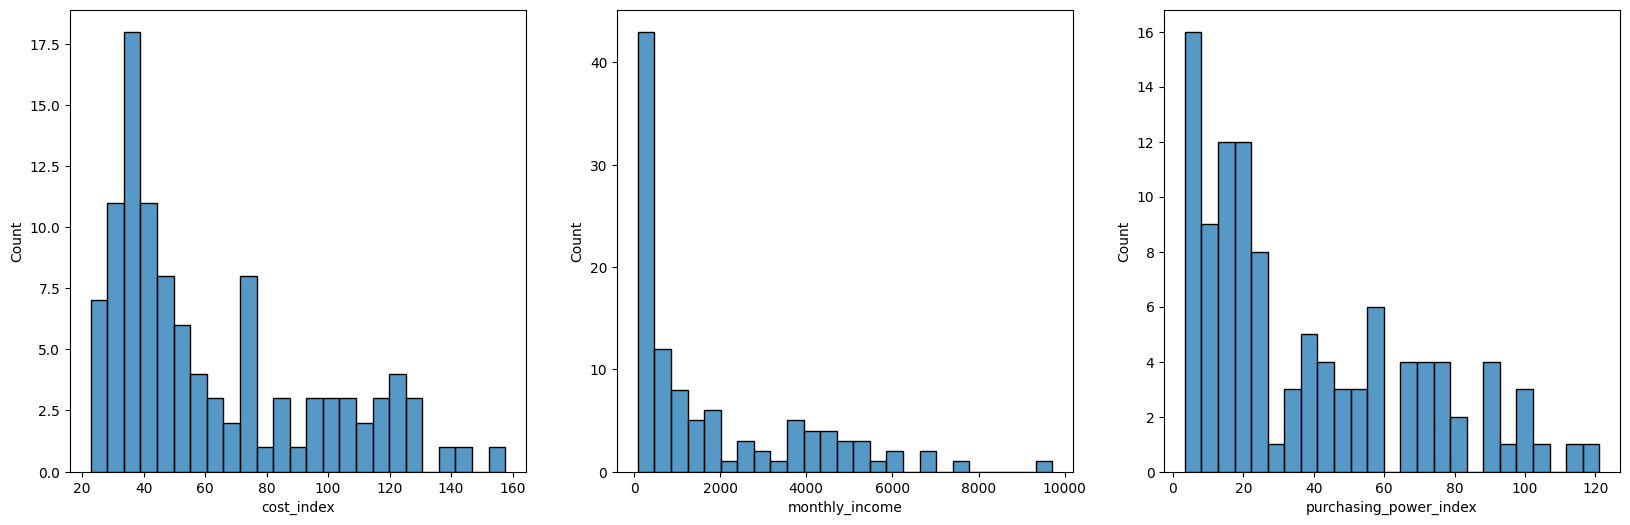

In [29]:
# Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing distribution of key numerical features
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(data=data, x='cost_index', ax=axes[0], bins=25)
sns.histplot(data=data, x='monthly_income', ax=axes[1], bins=25)
sns.histplot(data=data, x='purchasing_power_index', ax=axes[2], bins=25)

**Normalize Data​**

In [30]:
# Importing the MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns for scaling
df_to_scale = data[['cost_index', 'monthly_income', 'purchasing_power_index']].copy()

# Handling missing values (if any) by filling with 0
df_to_scale.fillna(0)

cost_index  monthly_income  purchasing_power_index
0         157.6            9712                   105.0
1         142.4            7530                    90.1
2         137.9            5281                    65.2
3         130.2            4130                    54.1
4         128.0            5368                    71.5
..          ...             ...                     ...
102        27.0              95                     6.0
103        25.8             125                     8.3
104        25.3              98                     6.6
105        23.0             148                    10.9
106        22.8              96                     7.2

[107 rows x 3 columns]

In [31]:
# Initializing and applying MinMaxScaler to normalize the data between 0 and 1
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_to_scale)

# Converting the normalized data back into a DataFrame for ease of interpretation
normalized_data = pd.DataFrame(normalized_data, columns=df_to_scale.columns)

# Display original and normalized data for comparison
print("Original Data:")
print(df_to_scale)
print("\nNormalized Data:")
print(normalized_data)

Original Data:
     cost_index  monthly_income  purchasing_power_index
0         157.6            9712                   105.0
1         142.4            7530                    90.1
2         137.9            5281                    65.2
3         130.2            4130                    54.1
4         128.0            5368                    71.5
..          ...             ...                     ...
102        27.0              95                     6.0
103        25.8             125                     8.3
104        25.3              98                     6.6
105        23.0             148                    10.9
106        22.8              96                     7.2

[107 rows x 3 columns]

Normalized Data:
     cost_index  monthly_income  purchasing_power_index
0      1.000000        1.000000                0.863212
1      0.887240        0.773299                0.736619
2      0.853858        0.539636                0.525064
3      0.796736        0.420052                

<Axes: xlabel='purchasing_power_index', ylabel='Count'>

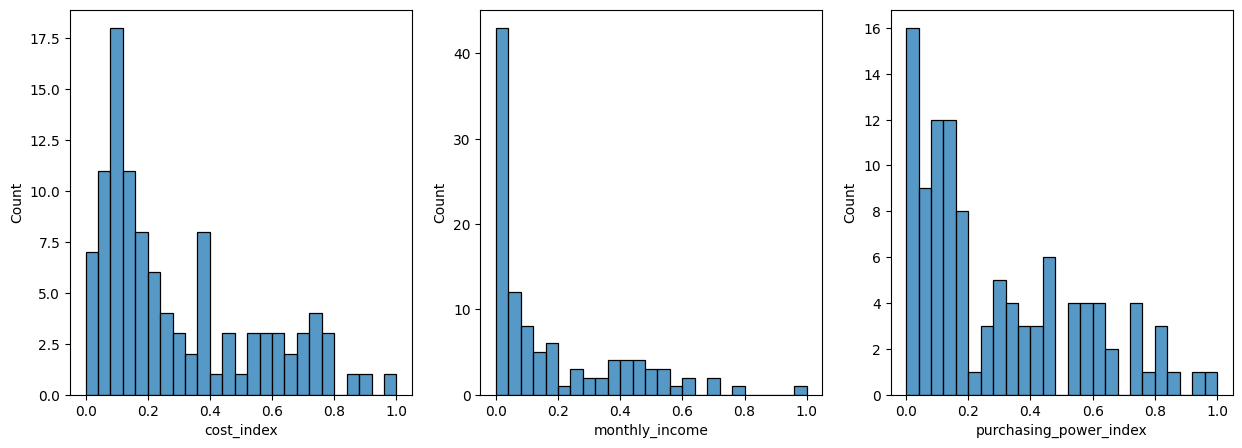

In [32]:
# Visualizing the distribution of normalized data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=normalized_data, x='cost_index', ax=axes[0], bins=25)
sns.histplot(data=normalized_data, x='monthly_income', ax=axes[1], bins=25)
sns.histplot(data=normalized_data, x='purchasing_power_index', ax=axes[2], bins=25)

**Standardize Data​**

In [33]:
# Importing the StandardScaler for standardization
from sklearn.preprocessing import StandardScaler

# Re-selecting numerical columns for standardization (if normalized data should be separate)
df_to_scale = data[['cost_index', 'monthly_income', 'purchasing_power_index']].copy()
df_to_scale.fillna(0)

# Initializing and applying StandardScaler to standardize the data (mean = 0, std = 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale)

# Converting the scaled data back into a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=df_to_scale.columns)

# Displaying original and standardized data
print("Original Data:")
print(df_to_scale)
print("\nStandardized Data:")
print(scaled_data)

Original Data:
     cost_index  monthly_income  purchasing_power_index
0         157.6            9712                   105.0
1         142.4            7530                    90.1
2         137.9            5281                    65.2
3         130.2            4130                    54.1
4         128.0            5368                    71.5
..          ...             ...                     ...
102        27.0              95                     6.0
103        25.8             125                     8.3
104        25.3              98                     6.6
105        23.0             148                    10.9
106        22.8              96                     7.2

[107 rows x 3 columns]

Standardized Data:
     cost_index  monthly_income  purchasing_power_index
0      2.829588        3.772161                2.195765
1      2.377068        2.728360                1.706354
2      2.243098        1.652509                0.888479
3      2.013860        1.101907              

<Axes: xlabel='purchasing_power_index', ylabel='Count'>

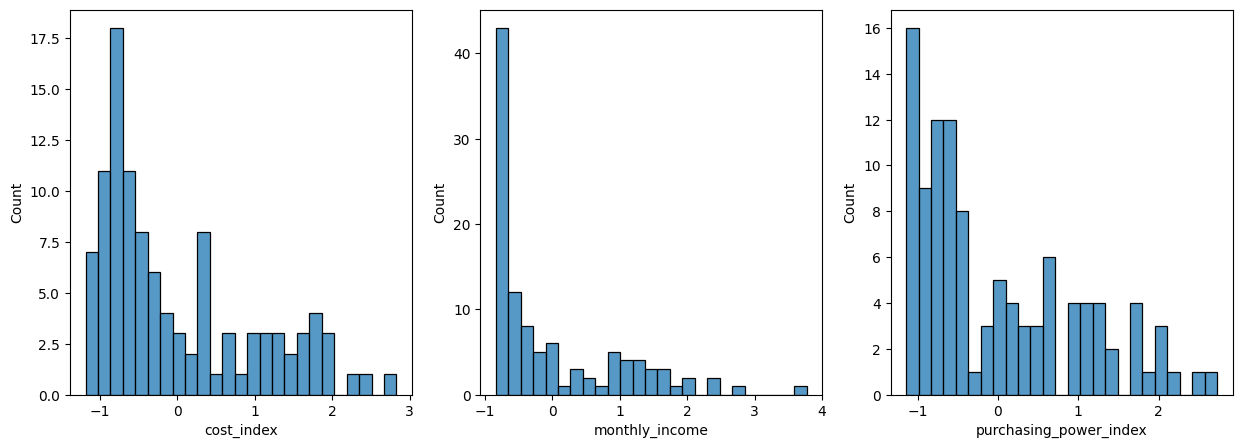

In [34]:
# Visualizing the distribution of standardized data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=scaled_data, x='cost_index', ax=axes[0], bins=25)
sns.histplot(data=scaled_data, x='monthly_income', ax=axes[1], bins=25)
sns.histplot(data=scaled_data, x='purchasing_power_index', ax=axes[2], bins=25)

**Transforming Skewed Data​**

In [35]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import boxcox

<ipython-input-36-d534ef9424dd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['monthly_income'], fit=norm, color="r")


Skew before Log Transformation: 1.370239


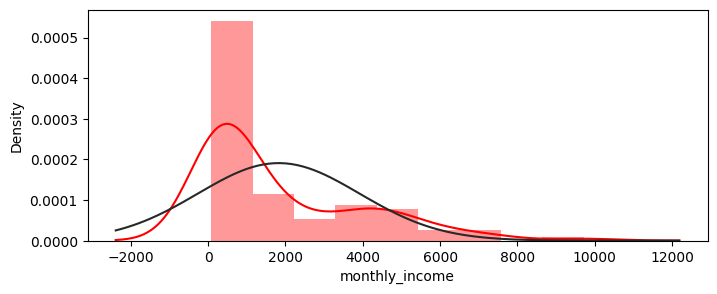

In [36]:
# Visualizing the distribution of 'monthly_income' and checking skewness before log transformation
plt.figure(figsize=(8, 3))
sns.distplot(data['monthly_income'], fit=norm, color="r")
print("Skew before Log Transformation: %f" % data['monthly_income'].skew())
plt.show()

In [37]:
# Check skewness
print("Skew of raw data: %f" % data['monthly_income'].skew())

Skew of raw data: 1.370239




*   Log Transformation



Skew after Log Transformation: 0.029167


<ipython-input-38-a8822a84f898>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log_monthly_income'], fit=norm, color="r")


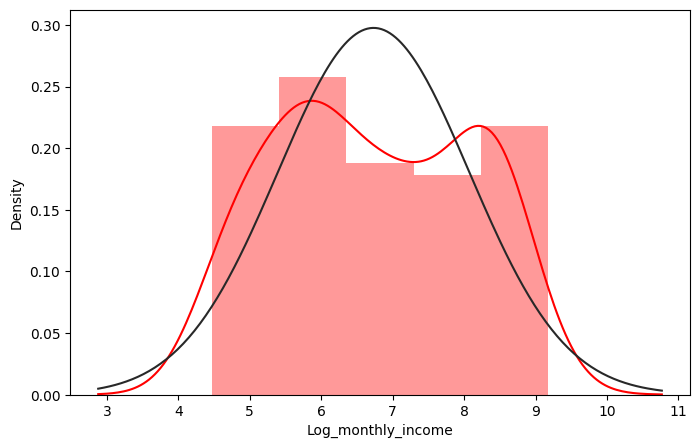

In [38]:
# Log transformation to reduce skewness in 'monthly_income'
data['Log_monthly_income'] = np.log(data['monthly_income'])

# Visualizing and checking skewness after log transformation
plt.figure(figsize=(8, 5))
sns.distplot(data['Log_monthly_income'], fit=norm, color="r")
print("Skew after Log Transformation: %f" % data['Log_monthly_income'].skew())

Skew after Log Transformation: 0.347039


<ipython-input-39-dd583e4e0a48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log_cost_index'], fit=norm, color="r")


count    107.000000
mean       4.002878
std        0.510674
min        3.126761
25%        3.594554
50%        3.889777
75%        4.437153
max        5.060060
Name: Log_cost_index, dtype: float64

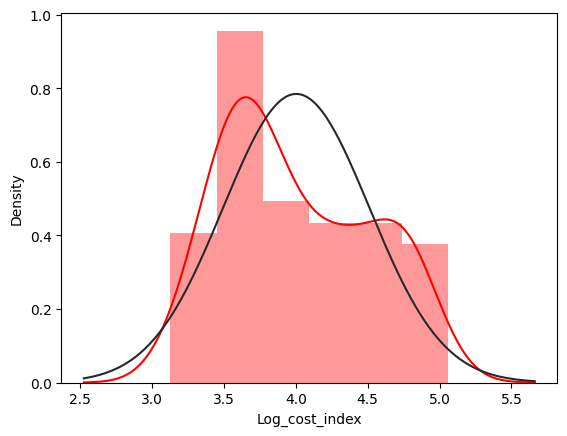

In [39]:
# Log transformation for 'cost_index' as well
data['Log_cost_index'] = np.log(data['cost_index'])

# Visualizing and checking skewness for 'cost_index'
sns.distplot(data['Log_cost_index'], fit=norm, color="r")
print("Skew after Log Transformation: %f" % data['Log_cost_index'].skew())

# Summary statistics for 'Log_cost_index'
data['Log_cost_index'].describe()



*   Box-Cox Transformation



<ipython-input-40-b367325c2781>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Box_cox, fit=norm, color="r")


Skew after Box-Cox Transformation: 0.028756


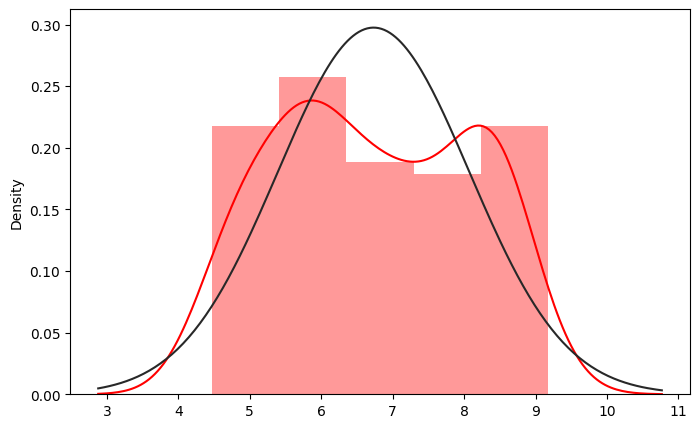

In [40]:
# Applying Box-Cox transformation on 'monthly_income' (lambda=0 corresponds to log transformation)
Box_cox = st.boxcox(data['monthly_income'], lmbda=0)

# Visualizing distribution and skewness after Box-Cox transformation
plt.figure(figsize=(8, 5))
sns.distplot(Box_cox, fit=norm, color="r")
print("Skew after Box-Cox Transformation: %f" % skew(Box_cox))

**Binning Individual Variable​**

In [41]:
# Displaying summary statistics of the dataset to define bin ranges
data.describe()

cost_index  monthly_income  purchasing_power_index  Log_monthly_income  \
count  107.000000      107.000000              107.000000          107.000000   
mean    62.555140     1826.532710               38.150467            6.733090   
std     33.747716     2100.275033               30.588024            1.347043   
min     22.800000       87.000000                3.400000            4.465908   
25%     36.400000      295.000000               14.050000            5.686952   
50%     48.900000      782.000000               25.800000            6.661855   
75%     84.550000     3130.000000               59.100000            8.047576   
max    157.600000     9712.000000              121.100000            9.181118   

       Log_cost_index  
count      107.000000  
mean         4.002878  
std          0.510674  
min          3.126761  
25%          3.594554  
50%          3.889777  
75%          4.437153  
max          5.060060

In [42]:
# Defining bin edges and labels for 'cost_index'
bin_edges_cost = [0, 30, 70, 110, 150, 170]
bin_labels_cost = ['<30', '30-70', '70-110', '110-150', '150+']

# Binning 'cost_index' into categorical groups
data['cost_index_group'] = pd.cut(data['cost_index'], bins=bin_edges_cost, labels=bin_labels_cost, right=False)

# Defining bin edges and labels for 'monthly_income'
bin_edges_income = [0, 800, 5000, 10000]
bin_labels_income = ['low', 'middle', 'high']

# Binning 'monthly_income' into categorical groups
data['monthly_income_group'] = pd.cut(data['monthly_income'], bins=bin_edges_income, labels=bin_labels_income, right=False)

# Displaying the DataFrame with new binning columns
display(data)

country  cost_index  monthly_income  purchasing_power_index  \
0           Bermuda       157.6            9712                   105.0   
1       Switzerland       142.4            7530                    90.1   
2    Cayman Islands       137.9            5281                    65.2   
3            Israel       130.2            4130                    54.1   
4           Iceland       128.0            5368                    71.5   
..              ...         ...             ...                     ...   
102           Burma        27.0              95                     6.0   
103        Pakistan        25.8             125                     8.3   
104      Kyrgyzstan        25.3              98                     6.6   
105          Angola        23.0             148                    10.9   
106      Tajikistan        22.8              96                     7.2   

     Log_monthly_income  Log_cost_index cost_index_group monthly_income_group  
0              9.181118        5.060060             150+                 high  
1              8.926650        4.958640          110-150                 high  
2              8.571871        4.926529          110-150                 high  
3              8.326033        4.869072          110-150               middle  
4              8.588211        4.852030          110-150                 high  
..                  ...             ...              ...                  ...  
102            4.553877        3.295837              <30                  low  
103            4.828314        3.250374              <30                  low  
104            4.584967        3.230804              <30                  low  
105            4.997212        3.135494              <30                  low  
106            4.564348        3.126761              <30                  low  

[107 rows x 8 columns]

In [43]:
# Define the bin edges and labels
bin_edges_cost = [0, 30, 70, 110, 150, 170]
bin_labels_cost = ['<30', '30-70', '70-110', '110-150', '150+']

# Define the bin edges and labels
bin_edges_income = [0, 800, 5000,10000]
bin_labels_income = ['low', 'middle', 'hight']

# Use Pandas' cut function to perform binning
data['cost_index_group'] = pd.cut(data['cost_index'], bins=bin_edges_cost, labels=bin_labels_cost, right=False)
data['monthly_income_group'] = pd.cut(data['monthly_income'], bins=bin_edges_income, labels=bin_labels_income, right=False)

# Print the DataFrame with the new "Age_Group" column
display(data)

country  cost_index  monthly_income  purchasing_power_index  \
0           Bermuda       157.6            9712                   105.0   
1       Switzerland       142.4            7530                    90.1   
2    Cayman Islands       137.9            5281                    65.2   
3            Israel       130.2            4130                    54.1   
4           Iceland       128.0            5368                    71.5   
..              ...         ...             ...                     ...   
102           Burma        27.0              95                     6.0   
103        Pakistan        25.8             125                     8.3   
104      Kyrgyzstan        25.3              98                     6.6   
105          Angola        23.0             148                    10.9   
106      Tajikistan        22.8              96                     7.2   

     Log_monthly_income  Log_cost_index cost_index_group monthly_income_group  
0              9.181118        5.060060             150+                hight  
1              8.926650        4.958640          110-150                hight  
2              8.571871        4.926529          110-150                hight  
3              8.326033        4.869072          110-150               middle  
4              8.588211        4.852030          110-150                hight  
..                  ...             ...              ...                  ...  
102            4.553877        3.295837              <30                  low  
103            4.828314        3.250374              <30                  low  
104            4.584967        3.230804              <30                  low  
105            4.997212        3.135494              <30                  low  
106            4.564348        3.126761              <30                  low  

[107 rows x 8 columns]